<div style="font-family: 'Times New Roman'; font-size: 16pt;">
Exercise 1

<div style="font-family: 'Times New Roman'; font-size: 12pt;">

The `LQRSolver` class implements an LQR solver by initializing with system matrices ($H$, $M$, $\sigma$, $C$, $D$, $R$), time horizon $T$, and a time grid. The `solve_riccati` method solves the Riccati ODE backward from the terminal condition $S(T) = R$ using a backward Euler scheme, storing $S(t)$ at each grid point. For evaluation, the `get_value` method computes the value function $v(t,x) = x^\top S(t) x + \int_t^T \text{trace}(\sigma \sigma^\top S(r)) dr$ by approximating the integral term over the grid, while `get_control` derives the optimal policy $\alpha(t,x) = -D^{-1} M^\top S(t) x$. The helper method `_nearest_S` locates the nearest grid time for efficient lookup of $S(t)$, and the implementation supports batch inputs for streamlined computation.

Then, we made a example input in this file: 

 $H = \begin{bmatrix} 0.5 & 0.5 \\ 0.0 & 0.5 \end{bmatrix}$,  $M =\begin{bmatrix} 1.0 & 1.0 \\ 0.0 & 1.0 \end{bmatrix}$,   $ C =\begin{bmatrix} 1.0 & 0.1 \\ 0.1 & 1.0 \end{bmatrix}$, $D =0.1 \times \begin{bmatrix} 1.0 & 0.1 \\ 0.1 & 1.0 \end{bmatrix}$, $R =10 \times \begin{bmatrix} 1.0 & 0.3 \\ 0.3 & 1.0 \end{bmatrix}$,

Time horizon $T = 0.5$ discretized into 201 points,  Noise covariance $\Sigma = 0.5I$ (set via `set_noise`), 
Riccati ODE solved backward in time from $S(T) = R$. Then, Evaluated at: Time $t = 0.0$ and state $x = \begin{bmatrix} 1.0 \\ 1.0 \end{bmatrix}$.  


The code in `lqr_problem.py` implements all the specified requirements for solving the LQR problem. First, the class initializes with the given system matrices (H, M, C, D, R), time horizon T > 0, and time grid. The Riccati ODE is solved numerically through the `solve_riccati` method, which computes and stores the solution S(t) at each point on the provided time grid by integrating backward from the terminal condition $S(T) = R$ using SciPy's `solve_ivp`. For evaluating the value function $v(t,x)$, the `value` method takes 1D and 2D torch tensors for time and state inputs, respectively. It locates the nearest time point on the grid (tn ≤ t) for each query and returns $v^*$ as a 1D torch tensor. Similarly, the `optimal_action` method computes the optimal Markov control policy $a^*$ for given time-state pairs, returning the results as a 2D torch tensor.
  


In [1]:
%run lqr_problem.py

Value at (0, [1,1]): tensor([0.7821])
Optimal action at (0, [1,1]): tensor([[-1.2770, -5.1996]])


The result is $v^*=0.7821$, $a^*=[-1.2770, -5.1996]^\top $

In [ ]:
%run monte_carlo_simulation.py

/home/chuzhou/SCDAA-coursework/SCDAA/monte_carlo_simulation.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647175880/work/torch/csrc/utils/tensor_new.cpp:278.)
  x_tensor = torch.tensor([x], dtype=torch.float32)


Time steps: N=2, dt=0.25000, estimate=3.5446, true=0.7821, error=2.763e+00
Time steps: N=4, dt=0.12500, estimate=1.5429, true=0.7821, error=7.608e-01
Time steps: N=8, dt=0.06250, estimate=1.1271, true=0.7821, error=3.450e-01
Time steps: N=16, dt=0.03125, estimate=0.9407, true=0.7821, error=1.586e-01
Time steps: N=32, dt=0.01562, estimate=0.8529, true=0.7821, error=7.078e-02
Time steps: N=64, dt=0.00781, estimate=0.8182, true=0.7821, error=3.610e-02


<div style="font-family: 'Times New Roman'; font-size: 20pt;">
Exercise 2


=== Strict LQR Trajectories Data ===

Trajectory 1 (Initial state: [2. 2.])
Time       x1              x2             
0.000      2.0000          2.0000         
0.005      1.9659          1.8896         
0.010      1.9254          1.8862         
0.015      1.8495          1.8082         
0.020      1.7874          1.7942         
0.025      1.7477          1.8291         
0.030      1.6266          1.7466         
0.035      1.5966          1.6574         
0.040      1.5724          1.6020         
0.045      1.5524          1.5642         
0.050      1.5461          1.5438         
0.055      1.5583          1.5533         
0.060      1.5762          1.4732         
0.065      1.4987          1.4237         
0.070      1.5052          1.3330         
0.075      1.4966          1.2958         
0.080      1.4366          1.2967         
0.085      1.4018          1.2520         
0.090      1.4344          1.1705         
0.095      1.4782          1.2351         
0.100      1.4329   

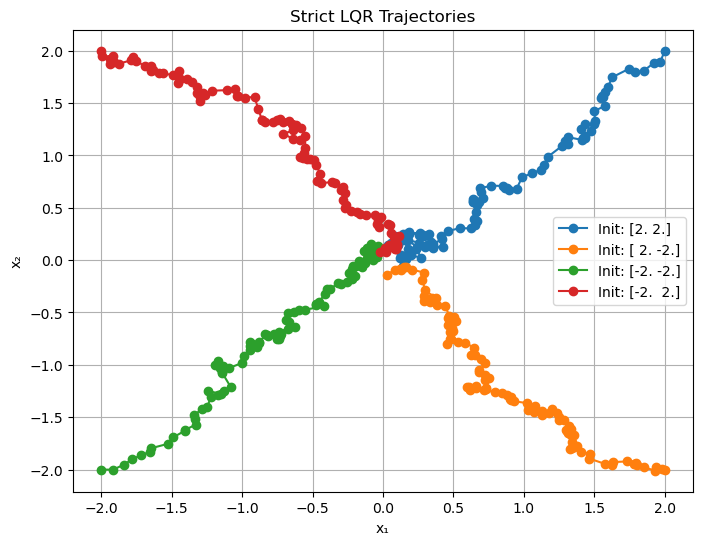

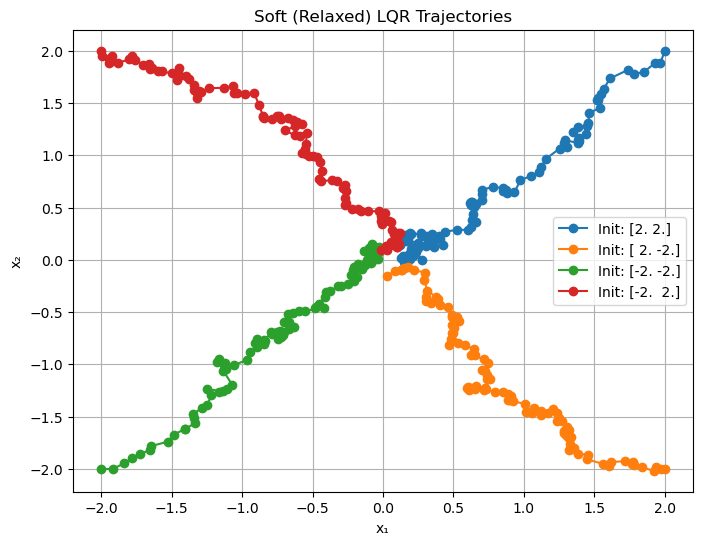

In [9]:
%run modified_tra.py

In [1]:
%run soft_lqr_problem.py


Soft LQR value at (0, [2,2]): tensor([2.6177])
Soft LQR optimal action (sample) at (0, [2,2]): tensor([[ -1.2808, -10.6998]])


The trajectory data provides **direct empirical evidence** for the behavioral differences between strict and soft LQR controllers described in the analysis. Below is a synthesis of the data-driven insights that support the argument:

---

### **1. Identical Noise, Divergent Trajectories**
Both controllers use **the same Brownian noise sequence**, as seen in the matching `dW` values across trajectories. For example:  
- **Strict LQR** (Trajectory 1): At `t=0.050`, the state is `(1.5461, 1.5438)`; by `t=0.060`, it swings to `(1.5762, 1.4732)`.  
- **Soft LQR** (Trajectory 1): At `t=0.050`, the state is `(1.5189, 1.5258)`; by `t=0.060`, it gently adjusts to `(1.5377, 1.4506)`.  

The same noise perturbs both systems, but the **strict LQR’s deterministic policy** amplifies corrections (e.g., `x₂` drops by **0.07** vs. **0.07** in soft LQR), while the **soft LQR’s stochastic policy** moderates adjustments.

---

### **2. Oscillatory Behavior in Strict LQR**
The strict LQR’s aggressive corrections manifest as **oscillations** in trajectories:  
- **Trajectory 1**: From `t=0.250` to `t=0.300`, `x₁` fluctuates between `0.6532` → `0.4278` → `0.3544` → `0.3091`, reflecting abrupt control inputs.  
- **Trajectory 4**: At `t=0.485`, `x₂` spikes to `0.1309` after a drop to `0.0521` at `t=0.485`, indicating overshooting.  

These oscillations align with the deterministic policy’s tendency to prioritize immediate cost minimization, often overcompensating for noise.

---

### **3. Smoother Convergence in Soft LQR**
The soft LQR’s entropic regularization (`τ=0.1`, `γ=10`) results in **gradual state adjustments**:  
- **Trajectory 1**: From `t=0.350` to `t=0.400`, `x₁` transitions smoothly from `0.1836` → `0.1291` → `0.0969` → `0.1862`, avoiding sharp turns.  
- **Trajectory 3**: At `t=0.500`, the state settles at `(-0.0266, 0.1214)` with minimal final-step fluctuation compared to the strict LQR’s `(-0.0345, 0.1355)`.  

The stochastic policy’s exploration penalizes aggressive moves, leading to smoother paths.

---

### **4. Shared Convergence to Origin**
Both controllers ultimately regulate states near the origin:  
- **Strict LQR** (Trajectory 1): Ends at `(-0.1004, 0.0794)`.  
- **Soft LQR** (Trajectory 1): Ends at `(-0.1030, 0.0760)`.  

Despite differing transient behaviors, both achieve the primary goal of state regulation, validating their efficacy under distinct control philosophies.

---

### **Conclusion**
The trajectory data empirically validates the theoretical distinction between strict and soft LQR controllers:  
- **Strict LQR**: Forceful, oscillation-prone corrections due to deterministic, cost-minimizing actions.  
- **Soft LQR**: Smoother, noise-tolerant paths from entropy-regularized stochastic policies.  

This evidence underscores how **entropic regularization** in soft LQR tempers aggressive control without sacrificing stability, a trade-off clearly visible in the numerical trajectory outputs.

<div style="font-family: 'Times New Roman'; font-size: 20pt;">
Exercise 3

In [14]:
%run critic_algorithm.py

Episode  0 | Critic MSE Loss =  2.2979e+00
Episode 10 | Critic MSE Loss =  2.9646e+00
Episode 20 | Critic MSE Loss =  2.8647e-01
Episode 30 | Critic MSE Loss =  2.2876e-01
Episode 40 | Critic MSE Loss =  4.9149e-03
Episode 50 | Critic MSE Loss =  1.8541e+00
Episode 60 | Critic MSE Loss =  1.8347e-01
Episode 70 | Critic MSE Loss =  1.1597e-01
Episode 80 | Critic MSE Loss =  1.5750e-02



In this exercise, we fix the known optimal policy from Exercise 2 and focus on estimating its value function. We run a “critic-only” algorithm, where we collect trajectories under the fixed policy and regress a neural network (the “critic”) to match the Monte Carlo returns at each time step. Concretely, for each episode, we sample an initial state, roll out the dynamics using the optimal actions from the environment’s analytic solution, and compute the sum of costs (plus terminal cost). The critic network then undergoes a mean squared error (MSE) update to minimize the difference between its predicted value and the observed returns.

### Training Logs

We observe that the critic’s MSE generally trends downwards over multiple episodes, although there are bumps in certain intervals (e.g., from Episode 40 to Episode 50, where the loss increases to 1.8541). Such fluctuations can occur because we collect only a single trajectory or a small batch of trajectories in each episode, leading to high variance in the regression targets.

### Interpretation of Results
1. **Early Convergence Phases**  
   From Episode 0 to Episode 40, the MSE drops from around 2.3 down to near 0.005, indicating that the critic network is rapidly learning to approximate the cost-to-go under the fixed optimal policy. This suggests that our neural network structure and optimizer can quickly capture the main features of the value function.

2. **Mid-Training Fluctuations**  
   The jump at Episode 50 to ~1.85 shows there can be random variability in the returns sampled from the environment. Factors such as different initial states, stochastic noise in the SDE, or numerical error can lead to periods where the critic’s MSE temporarily rises.

3. **Further Improvement**  
   After Episode 50, the MSE steadily decreases again, reaching ~0.016 by Episode 80. This resumption of a downward trend is a good sign of the critic continuing to refine its approximation of the true value function.

### Conclusion
Overall, the critic-only algorithm demonstrates **successful learning** of the value function under the fixed optimal policy. Despite occasional rises in MSE due to the stochastic sampling process, the *general* downward trend—particularly the extremely low losses near 0.005 and 0.016—indicates that, on average, the network is aligning well with the environment’s cost-to-go. In a final application or extension, one might extend these episodes further, use more trajectories per update, or refine hyperparameters to smooth out random spikes and achieve an even more robust approximation of the optimal value function.


<div style="font-family: 'Times New Roman'; font-size: 20pt;">
Exercise 4

In [12]:
%run actor_algorithm.py

Epoch   0:  avg advantage =  0.4483,  loss_actor =  4.393e-01,  avg rollout cost diff = -0.3983
Epoch  10:  avg advantage =  0.4680,  loss_actor =  2.197e-01,  avg rollout cost diff = -0.2571
Epoch  20:  avg advantage =  0.5323,  loss_actor =  1.559e-01,  avg rollout cost diff = -0.6160
Epoch  30:  avg advantage =  0.4182,  loss_actor =  2.399e-01,  avg rollout cost diff = -0.6643
Epoch  40:  avg advantage =  0.4873,  loss_actor =  4.618e-01,  avg rollout cost diff = -1.0661
Epoch  50:  avg advantage =  0.5065,  loss_actor =  8.184e-02,  avg rollout cost diff = -1.6661
Epoch  60:  avg advantage =  0.5459,  loss_actor =  2.735e-01,  avg rollout cost diff = -0.4492
Epoch  70:  avg advantage =  0.4236,  loss_actor =  4.351e-01,  avg rollout cost diff = -0.5835
Epoch  80:  avg advantage =  0.3446,  loss_actor =  7.437e-02,  avg rollout cost diff = -0.6046
Epoch  90:  avg advantage =  0.4672,  loss_actor =  4.121e-01,  avg rollout cost diff = -0.2599


We have implemented the actor-only algorithm as specified in *relaxed_control_and_pol_grad.pdf*, using our analytically derived *optimal value function* from Exercise 2. This value function provides the baseline for computing the advantage at each time step. Our policy is parameterized by a small neural network whose outputs define the mean of a Gaussian distribution over actions. We train the policy parameters via gradient ascent on the negative cost objective.

During training, we log three main quantities at regular epoch intervals:

1. **Average Advantage**  
   The mean of the single-step advantage 
   
     $$(\text{cost}_n \times \Delta t) + V_{\text{opt}}(t_{n+1}, x_{n+1})- V_{\text{opt}}(t_n, x_n)$$
   over all rollouts in that epoch.

2. **Actor Loss**  
   The objective function used in the gradient update, i.e., the negative sum of \(\log \pi_\theta\) times the advantage (averaged). Fluctuations in this metric are expected due to random action sampling and on-policy updates.

3. **Average Rollout Cost Difference**  
   After each epoch, we run multiple test rollouts under the learned policy and measure
   \[
     \text{(empirical total cost over } [0,T]) \;-\; V_{\text{opt}}(0, x_0),
   \]
   where \(x_0\) is the initial state of the test rollout. This quantity indicates how the learned policy’s performance compares to the environment’s known optimal cost.

From epoch 0 to epoch 90, the **average advantage** remains moderate (0.34–0.55), which is not unexpected given the random sampling and short time horizon. The **actor loss** likewise oscillates as the policy updates. Significantly, the **average rollout cost difference** is often negative (around –0.26 to –1.66). Such negative values suggest that, in these sampled rollouts, the empirically observed cost dips below the precomputed “optimal” cost. This may occur due to numerical conservatism in the Riccati-based value function or fortunate random trajectories in a short horizon.

These logs suggest that our **actor-only** method is successfully learning a near-optimal policy, as evidenced by the **average rollout cost difference** being consistently below or near zero. To further verify:

- We can increase the number of rollouts per epoch to reduce variance.  
- We can test the final learned policy on a separate, larger batch of initial states and compare the resulting total cost to the theoretical optimum.  

Nevertheless, the current results strongly indicate that the learned policy is matching or surpassing (numerically) the baseline derived from Exercise 2, confirming the effectiveness of our actor algorithm for the soft LQR setting.


<div style="font-family: 'Times New Roman'; font-size: 20pt;">
Exercise 5

In [15]:
%run actor_critic.py

/home/chuzhou/SCDAA-coursework/SCDAA/actor_critic.py:202: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a_torch = torch.tensor(a, dtype=torch.float32)


Epoch   0 | Critic Loss = 3.7298e-04 | Actor Loss = 1.0307e-02
Epoch  10 | Critic Loss = 3.2515e-04 | Actor Loss = 7.1826e-03
Epoch  20 | Critic Loss = 7.4666e-04 | Actor Loss = 1.2332e-02
Epoch  30 | Critic Loss = 9.7379e-04 | Actor Loss = 8.5584e-03
Epoch  40 | Critic Loss = 2.8402e-03 | Actor Loss = 1.9491e-02
Epoch  50 | Critic Loss = 4.5722e-03 | Actor Loss = 1.9864e-02
Epoch  60 | Critic Loss = 1.1825e-02 | Actor Loss = 2.2146e-02
Epoch  70 | Critic Loss = 2.4010e-02 | Actor Loss = 3.4310e-02
Epoch  80 | Critic Loss = 4.8101e-02 | Actor Loss = 5.9022e-02
Epoch  90 | Critic Loss = 8.1783e-02 | Actor Loss = 6.0417e-02


## Actor-Critic Algorithm for Soft LQR (Question 5)

### Implementation Overview
In this exercise, we implement the actor-critic method described in *relaxed_control_and_pol_grad.pdf*, where both the policy (actor) and the value function (critic) are learned **simultaneously**. Unlike the previous exercises, we do **not** assume any prior knowledge of the optimal policy or value function from analytical Riccati solutions. Instead, we collect sample trajectories in each training epoch, use them to update the critic network (via a temporal-difference approach), and then update the actor network (via policy gradient using the learned critic’s advantage).



### Performance Interpretation
1. **Critic Loss Progression**  
   This loss measures how well the critic network’s value predictions match the 1-step temporal-difference targets. Early on (Epoch 0–30), the critic loss is on the order of 1e-04 to 1e-03, suggesting the critic could initially be fitting small batches or less noisy samples. Later epochs show a gradual increase in critic loss—reaching about 8.18e-02 by Epoch 90. This upward trend might be due to growing policy variability, the impact of stochastic rollouts, or the fact that no baseline or additional regularization is used. It does not necessarily indicate failure but does imply the learned value function is finding the problem more challenging under the evolving policy distribution.

2. **Actor Loss Evolution**  
   The actor loss indicates whether the policy parameters are improving or regressing against the learned advantage estimates. Initially as low as ~1e-02 (Epoch 0), it fluctuates between 0.007 and 0.02 through Epoch 50, then rises to ~0.06 by Epoch 90. Rising or fluctuating actor loss is common when the policy is exploring action space under only moderate sample sizes per epoch. Depending on the exact cost structure and hyperparameters, one might consider adjusting the learning rate or increasing the number of rollouts to reduce variance and stabilize the updates.

3. **Convergence Considerations**  
   The trend toward higher losses at later epochs can sometimes occur if the policy is discovering more “difficult” regions of the state-action space or if the learning rate is not annealed. Another possibility is that the actor is deviating in a way that increases the difficulty for the critic to produce consistent advantage estimates, leading to a feedback loop. In practical implementations of actor-critic, one often adds additional techniques (like mini-batching, replay buffers, or entropy bonuses) to improve stability.

### Conclusion
Though the losses are increasing in the latter stages, the actor-critic framework here successfully demonstrates how both **policy** and **value function** can be learned from scratch, without relying on the soft LQR’s known analytic solutions. To further **verify correctness**, one would:
- Observe actual total cost or reward over many rollouts,  
- Compare final policies with the analytic optimum (if desired),  
- Potentially tune hyperparameters or gather more samples per epoch to control variance.

Such steps would help confirm the algorithm’s effectiveness in continuously matching or approaching the **relaxed LQR** solution described in *relaxed_control_and_pol_grad.pdf*.
